In [ ]:
import yfinance as yf
import matplotlib as mp
import pandas as pd

In [86]:
sp500 = yf.Ticker("^GSPC")

In [87]:
sp500 = sp500.history(period="MAX")

In [88]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-18 00:00:00-04:00,4445.129883,4466.359863,4442.109863,4453.529785,3161230000,0.0,0.0
2023-09-19 00:00:00-04:00,4445.410156,4449.850098,4416.609863,4443.950195,3614880000,0.0,0.0
2023-09-20 00:00:00-04:00,4452.810059,4461.029785,4401.379883,4402.200195,3308450000,0.0,0.0


In [89]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-09-11 00:00:00-04:00', '2023-09-12 00:00:00-04:00',
               '2023-09-13 00:00:00-04:00', '2023-09-14 00:00:00-04:00',
               '2023-09-15 00:00:00-04:00', '2023-09-18 00:00:00-04:00',
               '2023-09-19 00:00:00-04:00', '2023-09-20 00:00:00-04:00',
               '2023-09-21 00:00:00-04:00', '2023-09-22 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24047, freq=None)

<AxesSubplot:xlabel='Date'>

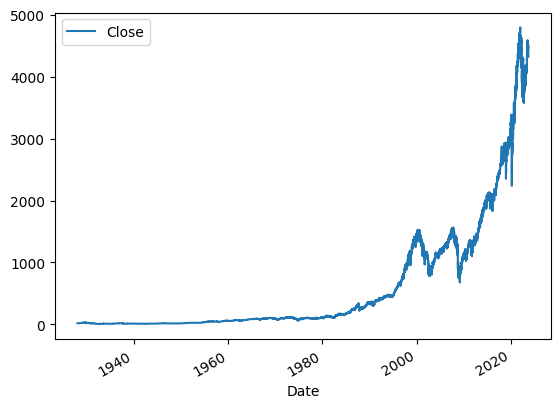

In [90]:
sp500.plot.line(y="Close", use_index=True)

In [91]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [92]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2023-09-18 00:00:00-04:00,4445.129883,4466.359863,4442.109863,4453.529785,3161230000
2023-09-19 00:00:00-04:00,4445.410156,4449.850098,4416.609863,4443.950195,3614880000
2023-09-20 00:00:00-04:00,4452.810059,4461.029785,4401.379883,4402.200195,3308450000


In [93]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [94]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [95]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-09-18 00:00:00-04:00,4445.129883,4466.359863,4442.109863,4453.529785,3161230000,4443.950195,0
2023-09-19 00:00:00-04:00,4445.410156,4449.850098,4416.609863,4443.950195,3614880000,4402.200195,0
2023-09-20 00:00:00-04:00,4452.810059,4461.029785,4401.379883,4402.200195,3308450000,4330.000000,0


In [96]:
sp500 = sp500.loc["1990-01-01":].copy()

In [97]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-09-18 00:00:00-04:00,4445.129883,4466.359863,4442.109863,4453.529785,3161230000,4443.950195,0
2023-09-19 00:00:00-04:00,4445.410156,4449.850098,4416.609863,4443.950195,3614880000,4402.200195,0
2023-09-20 00:00:00-04:00,4452.810059,4461.029785,4401.379883,4402.200195,3308450000,4330.000000,0


In [98]:
from   sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close","Volume","High","Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [99]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors]) #numpy array
preds = pd.Series(preds, index = test.index) #pandas series
precision_score (test["Target"], preds)

0.5161290322580645

In [100]:
combined = pd.concat([test["Target"], preds] , axis=1)

<AxesSubplot:xlabel='Date'>

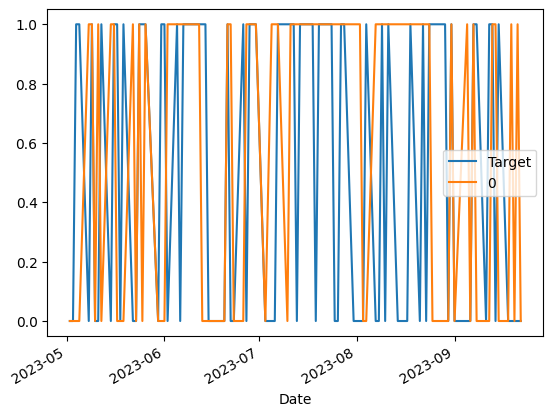

In [101]:
combined.plot()

In [102]:
def predict (train, test, predictors, models):
    model.fit(train[predictors],train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"],preds], axis = 1)
    return combined

In [103]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [104]:
predictions = backtest(sp500, model, predictors)

In [105]:
predictions ["Predictions"].value_counts()

0    3309
1    2688
Name: Predictions, dtype: int64

In [106]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5293898809523809

In [107]:
predictions["Target"].value_counts()/predictions.shape[0]

1    0.533433
0    0.466567
Name: Target, dtype: float64

In [108]:
horizons = [2,5,60,250,1000] #adding new predictors to improve model
new_predictors = []

for horizon in horizons:
    rolling_average = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"]/ rolling_average["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [109]:
sp500 = sp500.dropna(axis=0, subset=sp500.columns[sp500.columns != "Tomorrow"])

In [110]:
model = RandomForestClassifier(n_estimators=250, min_samples_split=50,random_state=1)

In [111]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [112]:
predictions = backtest(sp500, model, new_predictors)

In [115]:
predictions["Predictions"].value_counts()

0.0    4170
1.0     827
Name: Predictions, dtype: int64

In [118]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5719467956469165

In [120]:
predictions["Target"].value_counts()/ predictions.shape[0]

1    0.543126
0    0.456874
Name: Target, dtype: float64

In [121]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2023-09-18 00:00:00-04:00,0,0.0
2023-09-19 00:00:00-04:00,0,0.0
2023-09-20 00:00:00-04:00,0,0.0
